In [1]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

<ipython-input-1-961ba613f12c>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
# 데이터 가져오기
file_path = './boston.csv'
bost = pd.read_csv(file_path)
print(bost.columns)

# medv 종속변수 1개
# 독립변수 13개

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [3]:
# 앞 행 5개 출력
bost.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# 뒤 행 5개 출력
bost.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
# 독립(indeopen) 13개, 종속(deopen) 1개 / 속성을 대문자를 소문자로 써도 상관없음
indeopen = bost[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']]
deopen = bost[['medv']]
print(indeopen.shape)
print(deopen.shape)

(506, 13)
(506, 1)


In [6]:
# 모델의 구조 만듦!
X = tf.keras.layers.Input(shape=[13])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [7]:
# 데이터로 모델 학습(FIT)
# model.fit(indeopen, deopen, epochs = 500, verbose = 0) # verbose 0는 epochs 돌아가는 게 안 보인다.
model.fit(indeopen, deopen, epochs = 1500)

Epoch 1/1500
16/16 [==============================] - 1s 2ms/step - loss: 66865.4844
Epoch 2/1500
16/16 [==============================] - 0s 2ms/step - loss: 58476.2422
Epoch 3/1500
16/16 [==============================] - 0s 4ms/step - loss: 51637.8789
Epoch 4/1500
16/16 [==============================] - 0s 2ms/step - loss: 45366.6523
Epoch 5/1500
16/16 [==============================] - 0s 2ms/step - loss: 39598.7383
Epoch 6/1500
16/16 [==============================] - 0s 2ms/step - loss: 34260.7188
Epoch 7/1500
16/16 [==============================] - 0s 2ms/step - loss: 29336.5449
Epoch 8/1500
16/16 [==============================] - 0s 2ms/step - loss: 24818.5371
Epoch 9/1500
16/16 [==============================] - 0s 3ms/step - loss: 20725.9922
Epoch 10/1500
16/16 [==============================] - 0s 5ms/step - loss: 17041.0293
Epoch 11/1500
16/16 [==============================] - 0s 8ms/step - loss: 13751.4072
Epoch 12/1500
16/16 [==============================] - 0s 6ms/s

In [8]:
# 모델 사용 (predict value)
model.predict(indeopen[0:5])  # 우리의 예측값

1/1 [==============================] - 0s 93ms/step


array([[29.131916],
       [24.151636],
       [30.363361],
       [29.391502],
       [28.906609]], dtype=float32)

In [9]:
# 실제 csv 값의 종속값
deopen[0:5]

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [10]:
# 모델 수식 확인
model.get_weights()

[array([[-9.0398349e-02],
        [ 6.1807748e-02],
        [-4.7686577e-02],
        [ 3.1198437e+00],
        [ 1.4538100e+00],
        [ 4.7766657e+00],
        [-4.4244135e-04],
        [-9.6805245e-01],
        [ 1.6453494e-01],
        [-1.0312861e-02],
        [-2.1712795e-01],
        [ 1.4133074e-02],
        [-5.1115507e-01]], dtype=float32),
 array([3.075825], dtype=float32)]

In [11]:
# 실제로 사용되는 공식 (bhp = boston housing price)

'''bhp = -9.1603890e-02 * crim +
       6.1031673e-02 * zn +
      -5.0573904e-02 * indus +
       3.1523666e+00 * chas +
       1.4714948e+00 * nox +
       4.6555619e+00 * rm +
      -2.8746166e-05 * age +
      -9.7315133e-01 * dis +
       1.6093647e-01 * rad +
      -1.0838014e-02 * tax +
      -1.9352242e-01 * ptratio +
       1.4223248e-02 * b +
      -5.2187192e-01 * lstat +
      3.4369934'''

'bhp = -9.1603890e-02 * crim +\n       6.1031673e-02 * zn +\n      -5.0573904e-02 * indus +\n       3.1523666e+00 * chas +\n       1.4714948e+00 * nox +\n       4.6555619e+00 * rm +\n      -2.8746166e-05 * age +\n      -9.7315133e-01 * dis +\n       1.6093647e-01 * rad +\n      -1.0838014e-02 * tax +\n      -1.9352242e-01 * ptratio +\n       1.4223248e-02 * b +\n      -5.2187192e-01 * lstat +\n      3.4369934'

In [13]:
# 속성 줄이기 (13개 --> 9개로)
indeopen = bost[['crim', 'zn', 'indus', 'chas', 'rm', 'dis', 'ptratio', 'b', 'lstat']]
deopen = bost[['medv']]

print(indeopen.shape)
print(deopen.shape)

(506, 9)
(506, 1)


In [16]:
# 모델의 구조 만듦!
X = tf.keras.layers.Input(shape=[9])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [17]:
# 데이터로 모델 학습(FIT)
model.fit(indeopen, deopen, epochs = 1500)


Epoch 1/1500
16/16 [==============================] - 0s 3ms/step - loss: 9952.5430
Epoch 2/1500
16/16 [==============================] - 0s 3ms/step - loss: 8435.3418
Epoch 3/1500
16/16 [==============================] - 0s 3ms/step - loss: 7240.4180
Epoch 4/1500
16/16 [==============================] - 0s 3ms/step - loss: 6164.3013
Epoch 5/1500
16/16 [==============================] - 0s 3ms/step - loss: 5185.4541
Epoch 6/1500
16/16 [==============================] - 0s 3ms/step - loss: 4291.2495
Epoch 7/1500
16/16 [==============================] - 0s 3ms/step - loss: 3488.8706
Epoch 8/1500
16/16 [==============================] - 0s 2ms/step - loss: 2778.1633
Epoch 9/1500
16/16 [==============================] - 0s 2ms/step - loss: 2154.3201
Epoch 10/1500
16/16 [==============================] - 0s 3ms/step - loss: 1620.6055
Epoch 11/1500
16/16 [==============================] - 0s 3ms/step - loss: 1176.0558
Epoch 12/1500
16/16 [==============================] - 0s 4ms/step - loss:

In [18]:
# 모델 사용 (predict value)
model.predict(indeopen[0:5])  # 우리의 예측값

1/1 [==============================] - 0s 75ms/step


array([[29.938822],
       [23.888262],
       [30.204592],
       [29.03886 ],
       [28.575474]], dtype=float32)

In [19]:
# 실제 csv 값의 종속값
deopen[0:5]

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [20]:
# 모델 수식 확인
model.get_weights()

[array([[-0.07810916],
        [ 0.05057396],
        [-0.1198058 ],
        [ 3.3475788 ],
        [ 4.9160295 ],
        [-1.0321455 ],
        [-0.31212506],
        [ 0.0124276 ],
        [-0.5109709 ]], dtype=float32),
 array([3.5919552], dtype=float32)]

In [21]:
#  train:test = 8:2
tf.random.set_seed(111)
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='./boston(506_14).csv', test_split=0.2, seed=111)

57026/57026 [==============================] - 0s 1us/step


In [22]:
# 데이터 확인
print(x_train_full.shape, y_train_full.shape)
print("테스트 데이터: {}\t 레이블: {}".format (x_test.shape, y_test.shape))

(404, 13) (404,)
테스트 데이터: (102, 13)	 레이블: (102,)


In [23]:
print(x_train_full[0])    # [0]번째  13개 독립변수, feature, attribute

[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]


In [24]:
print(y_train_full[0])     # [0]번째 1개 종속변수의 실제값 $25,000 집값

25.0


In [25]:
# 데이터 전처리 (scale 바꾸기, val=0.3)
mean = np.mean(x_train_full, axis=0)
std  = np.std(x_train_full, axis=0)

x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full, test_size = 0.3, random_state=111)

print(x_train_full.shape, y_train_full.shape)  # 학습 데이터
print(x_train.shape,      y_train.shape)       # 학습 데이터
print(x_val.shape,        y_val.shape)         # 검증 데이터
print("테스트 데이터: {}\t 레이블: {}".format(x_test.shape,      y_test.shape))         # 테스트 데이터

(404, 13) (404,)
(282, 13) (282,)
(122, 13) (122,)
테스트 데이터: (102, 13)	 레이블: (102,)


In [26]:
# 모델 구성 (학습데이터가 작고 모델이 깊으면 => 과적합(Overfitting) 날 가능성 높음.)
model =  Sequential([Dense(128, activation='relu', input_shape=(13, ), name='dense1'),
                    Dense( 64, activation='relu', name='dense2'),
                    Dense( 32, activation='relu', name='dense3'),
                    Dense(1, name='output')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 128)               1792      
                                                                 
 dense2 (Dense)              (None, 64)                8256      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 12161 (47.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


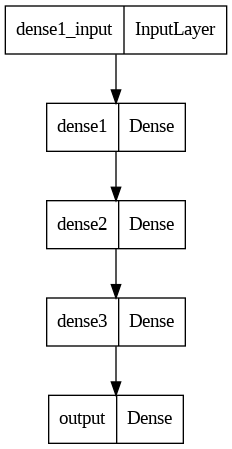

In [27]:
# model 그림 보기
plot_model(model)

In [28]:
# 모델 컴파일
# 회귀 에서는 평균제곱오차 MSE=mean squared error를 손실함수
# 평균절대오차 MAE = mean absolute error 를 평가지표로 많이 사용함
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.02),
              metrics =['mae'] )

In [29]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=300,
                    validation_data=(x_val, y_val))

Epoch 1/300
9/9 [==============================] - 2s 60ms/step - loss: 201.1735 - mae: 10.4871 - val_loss: 45.0604 - val_mae: 4.9063
Epoch 2/300
9/9 [==============================] - 0s 15ms/step - loss: 39.1949 - mae: 4.8209 - val_loss: 21.6981 - val_mae: 3.6670
Epoch 3/300
9/9 [==============================] - 0s 14ms/step - loss: 22.9770 - mae: 3.6296 - val_loss: 18.6449 - val_mae: 3.2950
Epoch 4/300
9/9 [==============================] - 0s 15ms/step - loss: 18.3594 - mae: 3.0215 - val_loss: 16.0436 - val_mae: 3.0711
Epoch 5/300
9/9 [==============================] - 0s 15ms/step - loss: 13.4141 - mae: 2.6078 - val_loss: 12.1380 - val_mae: 2.6708
Epoch 6/300
9/9 [==============================] - 0s 14ms/step - loss: 12.4608 - mae: 2.4614 - val_loss: 10.0549 - val_mae: 2.3806
Epoch 7/300
9/9 [==============================] - 0s 14ms/step - loss: 11.3174 - mae: 2.3646 - val_loss: 9.9054 - val_mae: 2.4133
Epoch 8/300
9/9 [==============================] - 0s 15ms/step - loss: 12.

In [30]:
# 모델 평가
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 15.8197 - mae: 2.8688


[15.819730758666992, 2.868845224380493]

In [31]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


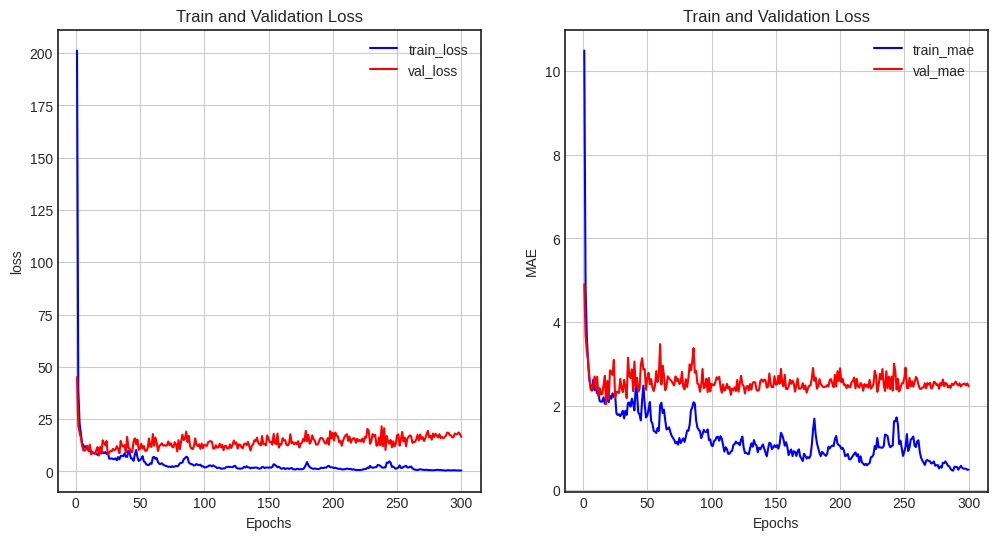

In [32]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs=range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 6))

ax1 =fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 =fig.add_subplot(1,2,2)
ax2.plot(epochs, mae, color='blue', label='train_mae')
ax2.plot(epochs, val_mae, color='red', label='val_mae')
ax2.set_title('Train and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()